In [1]:
!pip install ultralytics

from IPython import display
display.clear_output()

In [2]:
import yaml
from ultralytics import YOLO

import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import pathlib
%matplotlib inline
from collections import Counter

In [3]:
# turn off wandb!
!wandb disabled

W&B disabled.


In [4]:
!cat ../input/blood-cell-detection-datatset/data.yaml

train: ../train/images
val: ../valid/images

nc: 3
names: ['Platelets', 'RBC', 'WBC']

In [6]:
ls -1 ../input/blood-cell-detection-datatset/train/images | wc -l

765


In [7]:
# Load the YAML file
with open('../input/blood-cell-detection-datatset/data.yaml', 'r') as f:
    data_yaml = yaml.safe_load(f)

# update YAML with absolute path to kaggle data. You must use absolute path, relative path won't work
data_yaml['train'] = '/kaggle/input/blood-cell-detection-datatset/train/images'
data_yaml['val'] = '/kaggle/input/blood-cell-detection-datatset/valid/images'

# write to disk
with open('data.yaml', 'w') as f:
    yaml.dump(data_yaml, f)

In [8]:
data_yaml

{'train': '/kaggle/input/blood-cell-detection-datatset/train/images',
 'val': '/kaggle/input/blood-cell-detection-datatset/valid/images',
 'nc': 3,
 'names': ['Platelets', 'RBC', 'WBC']}

## Set the data directory

In [9]:
data_dir = Path("../input/blood-cell-detection-datatset")
images_dir = data_dir / "train" / "images"
labels_dir = data_dir / "train" / "labels"

class_names = data_yaml['names']

# Read the image file paths and annotations
image_paths = sorted(list(images_dir.glob("*.jpg"))) # images and paths must be sorted same way
label_paths = sorted(labels_dir.glob("*.txt"))

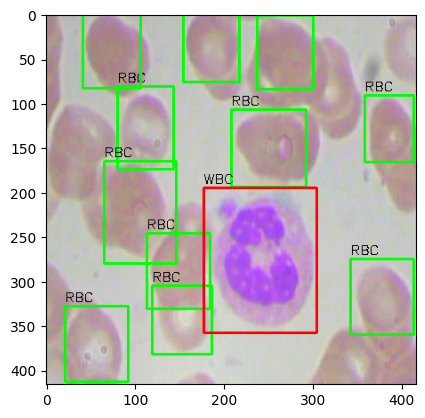

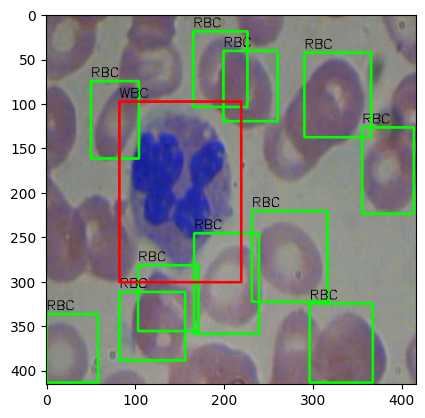

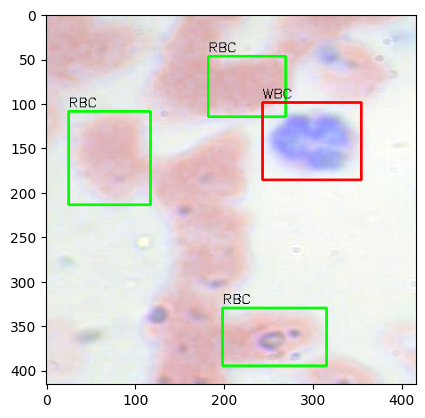

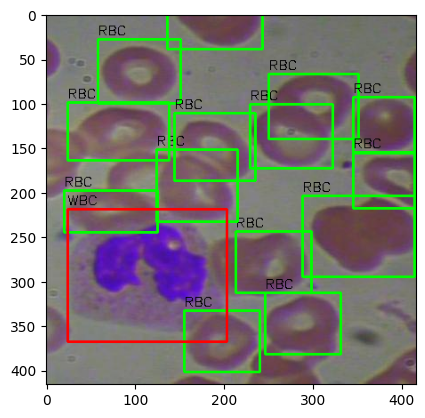

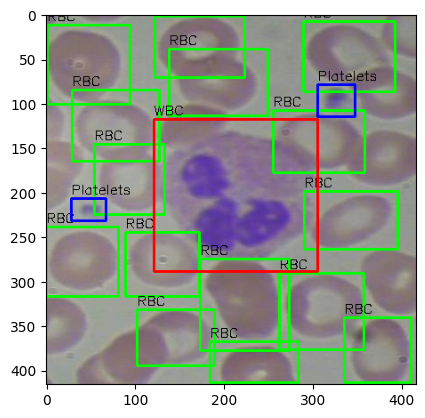

In [10]:

num_images = 5

image_files = [f for f in pathlib.Path(images_dir).iterdir() if f.is_file()]

random.shuffle(image_files)

selected_image_files = image_files[:num_images]

for selected_image_file in selected_image_files:
    demo_image = selected_image_file
    demo_label = pathlib.Path(labels_dir) / f"{selected_image_file.stem}.txt"
    image = cv2.imread(str(demo_image))
    class_list = data_yaml['names']
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
    height, width, _ = image.shape
    T = []
    with open(demo_label, "r") as file1:
        for line in file1.readlines():
            split = line.split(" ")
            class_id = int(split[0])
            color = colors[class_id]
            clazz = class_list[class_id]
            x, y, w, h = float(split[1]), float(split[2]), float(split[3]), float(split[4])
            box = [int((x - 0.5*w)* width), int((y - 0.5*h) * height), int(w*width), int(h*height)]
            cv2.rectangle(image, box, color, 2)
            cv2.putText(image, class_list[class_id], (box[0], box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        image = cv2.resize(image, (600, 600))
        plt.show()

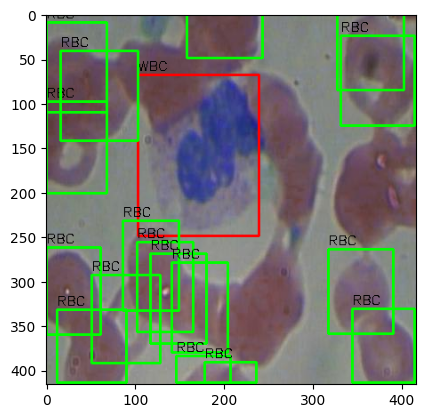

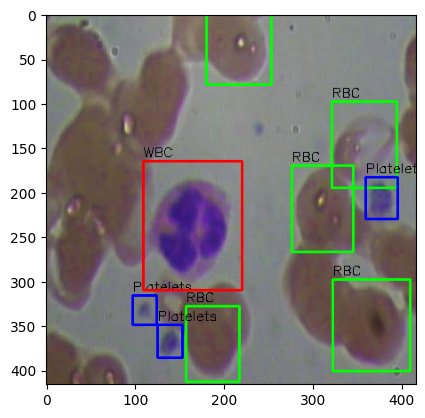

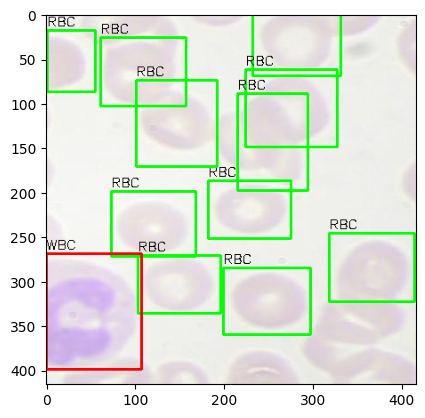

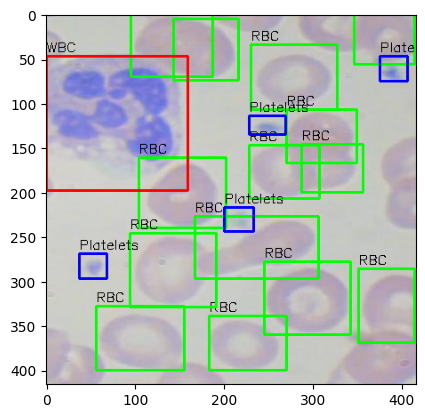

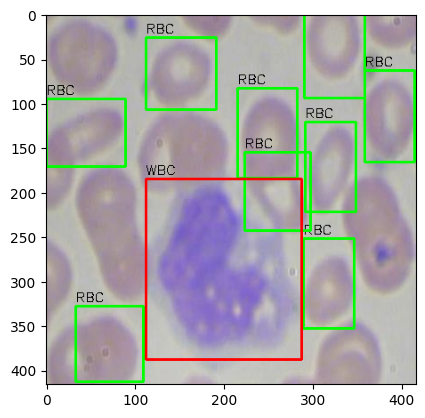

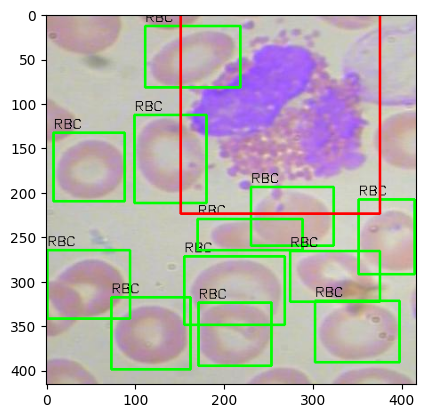

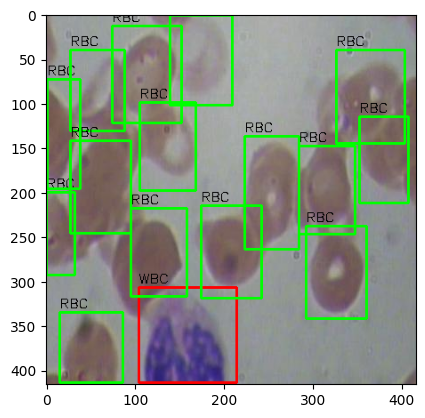

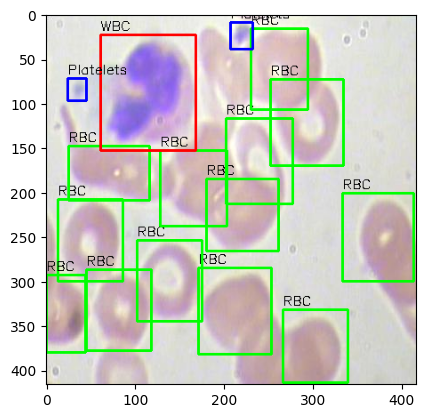

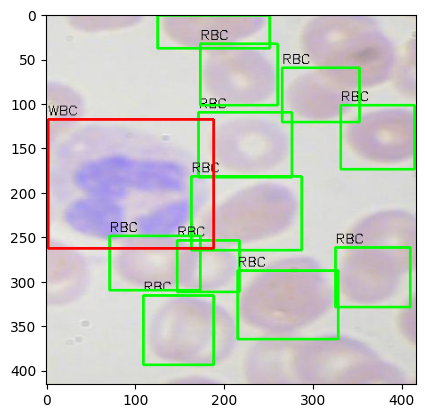

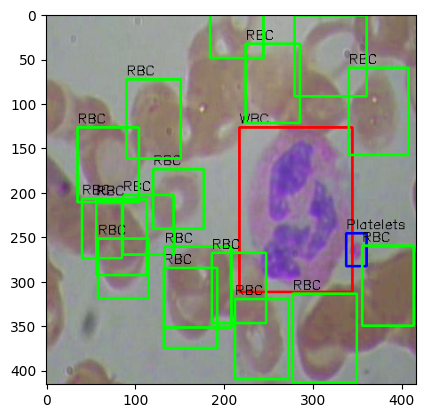

In [11]:
num_images = 10
image_files = [f for f in pathlib.Path(images_dir).iterdir() if f.is_file()]

random.shuffle(image_files)

selected_image_files = image_files[:num_images]

for selected_image_file in selected_image_files:
    demo_image = selected_image_file
    demo_label = pathlib.Path(labels_dir) / f"{selected_image_file.stem}.txt"
    image = cv2.imread(str(demo_image))
    class_list = data_yaml['names']
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
    height, width, _ = image.shape
    T = []
    with open(demo_label, "r") as file1:
        for line in file1.readlines():
            split = line.split(" ")
            class_id = int(split[0])
            color = colors[class_id]
            clazz = class_list[class_id]
            x, y, w, h = float(split[1]), float(split[2]), float(split[3]), float(split[4])
            box = [int((x - 0.5*w)* width), int((y - 0.5*h) * height), int(w*width), int(h*height)]
            cv2.rectangle(image, box, color, 2)
            cv2.putText(image, class_list[class_id], (box[0], box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        image = cv2.resize(image, (600, 600))
        plt.show()

In [10]:

baseline_model = YOLO('yolov8x.yaml')

In [11]:
params = {
    'data':'data.yaml',
    'imgsz':416,
    'epochs':25,
    'optimizer':'Adam',
    #'pretrained':True,
    'pretrained':False,
    'lr0':0.1, # I think this is too high!
    'lrf': 0.00001,
    'cos_lr': True
}

In [12]:
results = baseline_model.train(**params)

Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

100%|██████████| 755k/755k [00:00<00:00, 37.7MB/s]
2024-04-21 01:38:13,551	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-21 01:38:14,292	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-21 01:38:16.706814: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 01:38:16.706914: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 01:38:16.824037: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 160MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/blood-cell-detection-datatset/train/labels... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:01<00:00, 438.75it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/blood-cell-detection-datatset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/blood-cell-detection-datatset/valid/labels... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<00:00, 403.59it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/blood-cell-detection-datatset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      7.43G      3.537      3.141      3.062        412        416: 100%|██████████| 48/48 [00:36<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]

                   all         73        967      0.336     0.0118    0.00114    0.00033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.62G      3.194      2.614      2.629        221        416: 100%|██████████| 48/48 [00:29<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all         73        967    0.00435     0.0213    0.00249   0.000945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.59G       3.03      2.583      2.597        202        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         73        967     0.0254      0.489     0.0319    0.00821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.58G      2.945      2.533      2.531        251        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         73        967     0.0197      0.562     0.0398     0.0127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25       6.6G        2.8      2.778      2.407        221        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all         73        967   0.000381      0.116   0.000272   0.000105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.6G      2.479      2.431      2.213        236        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]


                   all         73        967     0.0028     0.0749    0.00306   0.000736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.59G      2.375      2.325      2.145        253        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         73        967      0.012      0.249     0.0565       0.02



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.58G      2.262      2.219      2.094        317        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]

                   all         73        967     0.0808     0.0985     0.0636     0.0209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.59G      2.215       2.07      2.043        222        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]


                   all         73        967      0.116      0.155       0.12     0.0539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.59G      2.062      1.853       1.98        381        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         73        967      0.116      0.155       0.12     0.0539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       6.6G      1.952      1.734      1.951        253        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


                   all         73        967       0.22      0.328       0.18      0.074

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.59G      1.883      1.636      1.887        235        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]


                   all         73        967      0.547      0.243      0.267     0.0905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.59G      1.808      1.571      1.844        254        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         73        967      0.276      0.288      0.274      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.59G      1.754      1.464      1.812        251        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]


                   all         73        967      0.518       0.18      0.229     0.0965

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.59G       1.69      1.406      1.776        207        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


                   all         73        967      0.332      0.763      0.536      0.247
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.58G      1.638      1.445      1.805        155        416: 100%|██████████| 48/48 [00:32<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all         73        967      0.578     0.0492      0.105     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.6G      1.593      1.344      1.777        165        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]


                   all         73        967      0.687      0.446      0.556       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25       6.6G      1.576      1.282      1.765        167        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         73        967      0.667      0.661      0.696      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       6.6G      1.529      1.219      1.725        161        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]


                   all         73        967      0.742      0.618      0.762      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.6G      1.523      1.199      1.707        158        416: 100%|██████████| 48/48 [00:28<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         73        967      0.605      0.669       0.79       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       6.6G        1.5      1.169      1.696        162        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]


                   all         73        967      0.621      0.715      0.793      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       6.6G      1.466      1.123       1.67        173        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]


                   all         73        967      0.684      0.737       0.81      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      1.448      1.119      1.679        170        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]


                   all         73        967       0.68      0.806      0.835       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.58G      1.432      1.099      1.662        194        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         73        967      0.723      0.831      0.847      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.6G      1.425       1.09       1.65        213        416: 100%|██████████| 48/48 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]


                   all         73        967      0.712      0.827      0.852      0.466

25 epochs completed in 0.233 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8x summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.48s/it]


                   all         73        967      0.699      0.837      0.853      0.466
             Platelets         73         76      0.872      0.717      0.868      0.366
                   RBC         73        819      0.655       0.82      0.818      0.542
                   WBC         73         72       0.57      0.972      0.872      0.489
Speed: 0.1ms preprocess, 12.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


In [13]:
res = baseline_model.val()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8x summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /kaggle/input/blood-cell-detection-datatset/valid/labels... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<00:00, 767.70it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/blood-cell-detection-datatset/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  2.00s/it]


                   all         73        967       0.71      0.828      0.853      0.465
             Platelets         73         76       0.88      0.711      0.868       0.36
                   RBC         73        819      0.672        0.8      0.818      0.542
                   WBC         73         72      0.577      0.972      0.872      0.492
Speed: 0.2ms preprocess, 14.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2


In [14]:
res.confusion_matrix.print()

54.0 0.0 0.0 8.0
0.0 666.0 1.0 333.0
1.0 0.0 70.0 50.0
21.0 153.0 1.0 0.0


# Stop here and do first inference
The original notebook did more param tuning, but I'll infer right here...


In [15]:
baseline_model.info()

YOLOv8x summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


(268, 68126457, 0, 257.40062720000003)


0: 416x416 7 RBCs, 1 WBC, 37.9ms
1: 416x416 1 Platelets, 19 RBCs, 1 WBC, 37.9ms
Speed: 0.8ms preprocess, 37.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


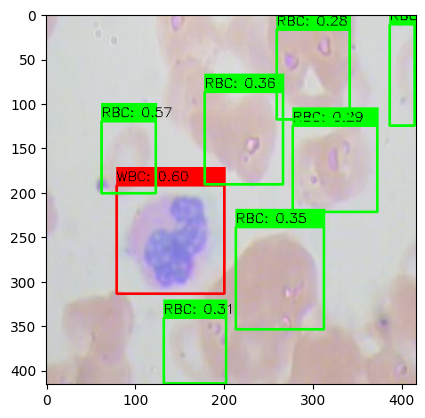

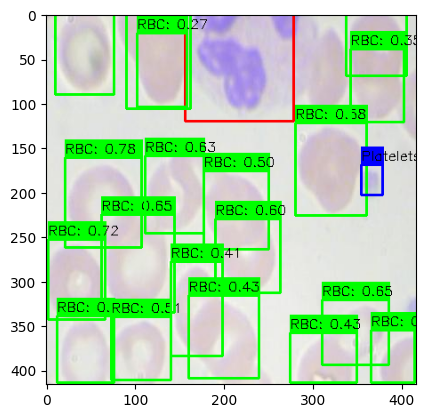

In [16]:
def test_inference(model):
    selected_image_files = image_files[:2]
    results = model(selected_image_files)
    i = 0
    for result in results:
        boxes = result.boxes  # Boxes object for bbox outputs
        masks = result.masks  # Masks object for segmentation masks outputs
        keypoints = result.keypoints  # Keypoints object for pose outputs
        probs = result.probs  # Probs object for classification outputs
    
        image_file = selected_image_files[i]
        i = i + 1
        image = cv2.imread(str(image_file))
        
        for b in boxes:
            xywh = b.xywh
            x = int(xywh[0][0].item())
            y = int(xywh[0][1].item())
            w = int(xywh[0][2].item())
            h = int(xywh[0][3].item())
            conf = b.conf.item()

            class_id = int(b.cls.item())
            color = colors[class_id]
            clazz = class_list[class_id]
            
            w2 = int(w/2)
            h2 = int(h/2)
            box = [x-w2,y-h2,w,h]
            # Rescale the x, y, w, h values to the size of the image
            #box = [int((x - 0.5*w)* width), int((y - 0.5*h) * height), int(w*width), int(h*height)]


            # Draw a rectangle on the image using the 'box' and 'color' values
            cv2.rectangle(image, box, color, 2)

            # Draw a filled rectangle for the class label on the image
            cv2.rectangle(image, (box[0], box[1] - 20), (box[0] + box[2], box[1]), color, -1)

            # Write the class label on the image
            cap = f'{clazz}: {conf:.2f}'
            cv2.putText(image, cap, (box[0], box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))
            
            
        # Show the image using matplotlib
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        # Optionally resize the image (commented out in code)
        #image = cv2.resize(image, (600, 600)) 
        plt.show()
        
test_inference(baseline_model)

In [17]:
model_1 = YOLO('yolov8s.yaml')

In [18]:
results = model_1.train(**params)

Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

train: Scanning /kaggle/input/blood-cell-detection-datatset/train/labels... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<00:00, 937.00it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/blood-cell-detection-datatset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/blood-cell-detection-datatset/valid/labels... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<00:00, 675.89it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/blood-cell-detection-datatset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         4G      3.508      2.842      3.081        412        416: 100%|██████████| 48/48 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.08it/s]

                   all         73        967    0.00265     0.0057    0.00139   0.000476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      3.38G       2.98      2.495      2.537        221        416: 100%|██████████| 48/48 [00:08<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]

                   all         73        967     0.0849     0.0699     0.0515     0.0161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      3.37G      2.547      2.388      2.323        202        416: 100%|██████████| 48/48 [00:08<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.92it/s]

                   all         73        967    0.00565      0.382     0.0228    0.00511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      3.37G      2.286      2.191      2.221        251        416: 100%|██████████| 48/48 [00:08<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]

                   all         73        967      0.725     0.0342     0.0249     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.36G      2.166      1.973      2.144        221        416: 100%|██████████| 48/48 [00:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.52it/s]

                   all         73        967     0.0011    0.00326   0.000477   0.000118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      3.36G      2.055      1.917      2.114        236        416: 100%|██████████| 48/48 [00:08<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         73        967      0.458      0.453      0.462      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      3.36G      1.961      1.727      2.047        253        416: 100%|██████████| 48/48 [00:08<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]

                   all         73        967      0.692    0.00926    0.00949    0.00294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      3.36G      1.896      1.653      1.989        317        416: 100%|██████████| 48/48 [00:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]

                   all         73        967      0.153      0.408      0.199     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      3.36G      1.845      1.579      1.922        222        416: 100%|██████████| 48/48 [00:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]

                   all         73        967      0.126      0.775      0.396      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      3.36G      1.792      1.539      1.886        381        416: 100%|██████████| 48/48 [00:08<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all         73        967      0.338       0.12    0.00763    0.00093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      3.36G      1.755      1.535      1.881        253        416: 100%|██████████| 48/48 [00:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]

                   all         73        967      0.614      0.708      0.761      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      3.36G      1.733      1.471      1.826        235        416: 100%|██████████| 48/48 [00:08<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]

                   all         73        967      0.651      0.544       0.63      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      3.36G      1.737       1.42      1.846        254        416: 100%|██████████| 48/48 [00:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         73        967      0.449      0.582       0.45      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      3.36G      1.689      1.381      1.802        251        416: 100%|██████████| 48/48 [00:08<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]

                   all         73        967      0.346        0.8        0.5       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      3.36G      1.643      1.363      1.777        207        416: 100%|██████████| 48/48 [00:08<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]

                   all         73        967      0.536      0.581      0.534      0.263


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      3.36G        1.6      1.356      1.861        155        416: 100%|██████████| 48/48 [00:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]

                   all         73        967      0.732      0.779      0.785      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      3.36G      1.606      1.323      1.874        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]

                   all         73        967      0.662      0.726      0.773      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      3.36G      1.567      1.288      1.828        167        416: 100%|██████████| 48/48 [00:07<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]

                   all         73        967      0.627       0.71      0.789      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      3.36G      1.524      1.221      1.789        161        416: 100%|██████████| 48/48 [00:07<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]

                   all         73        967      0.669      0.801      0.851      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      3.36G      1.527      1.197      1.792        158        416: 100%|██████████| 48/48 [00:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]

                   all         73        967      0.734      0.589      0.782      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      3.36G      1.486      1.169      1.752        162        416: 100%|██████████| 48/48 [00:08<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]

                   all         73        967      0.784      0.878      0.865      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      3.36G      1.466      1.136      1.726        173        416: 100%|██████████| 48/48 [00:08<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]

                   all         73        967      0.785      0.857      0.862      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      3.36G      1.448      1.134      1.732        170        416: 100%|██████████| 48/48 [00:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]

                   all         73        967      0.788      0.886      0.873      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      3.36G      1.444      1.114      1.729        194        416: 100%|██████████| 48/48 [00:08<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]

                   all         73        967      0.765      0.876      0.871      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      3.36G      1.429      1.108      1.716        213        416: 100%|██████████| 48/48 [00:07<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]

                   all         73        967      0.778      0.854      0.867      0.537



25 epochs completed in 0.072 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]


                   all         73        967      0.764      0.875      0.871      0.537
             Platelets         73         76      0.764      0.855      0.839      0.382
                   RBC         73        819      0.693      0.769      0.802      0.509
                   WBC         73         72      0.836          1       0.97       0.72
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train3



0: 416x416 1 Platelets, 12 RBCs, 1 WBC, 39.3ms
1: 416x416 1 Platelets, 19 RBCs, 1 WBC, 39.3ms
Speed: 0.7ms preprocess, 39.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


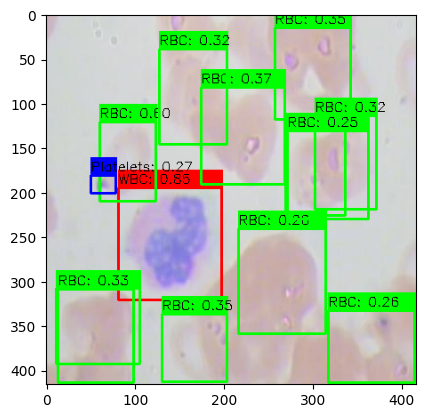

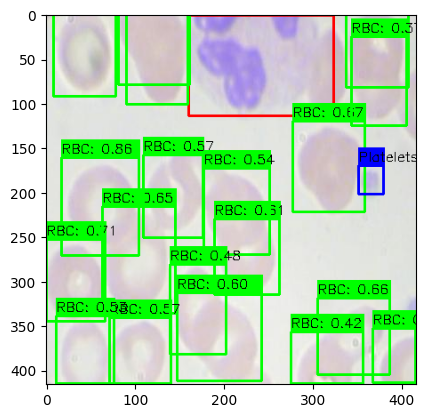

In [19]:
test_inference(model_1)

In [20]:
params['label_smoothing'] = 0.15

In [21]:
# note: your path may differ from what I have here, check the output from the run above for details
model_2 =  YOLO('yolov8s.yaml')
model_2.train(**params)

Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

train: Scanning /kaggle/input/blood-cell-detection-datatset/train/labels... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<00:00, 828.10it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/blood-cell-detection-datatset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/blood-cell-detection-datatset/valid/labels... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<00:00, 640.12it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/blood-cell-detection-datatset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train4
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      3.71G      3.508      2.842      3.081        412        416: 100%|██████████| 48/48 [00:14<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.14it/s]

                   all         73        967    0.00265     0.0057    0.00139   0.000476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      3.66G       2.98      2.495      2.537        221        416: 100%|██████████| 48/48 [00:08<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]

                   all         73        967     0.0849     0.0699     0.0515     0.0161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      3.42G      2.547      2.388      2.323        202        416: 100%|██████████| 48/48 [00:08<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.01it/s]

                   all         73        967    0.00565      0.382     0.0228    0.00511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      3.42G      2.286      2.191      2.221        251        416: 100%|██████████| 48/48 [00:08<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.06it/s]

                   all         73        967      0.725     0.0342     0.0249     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.42G      2.166      1.973      2.144        221        416: 100%|██████████| 48/48 [00:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.55it/s]

                   all         73        967     0.0011    0.00326   0.000477   0.000118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      3.42G      2.055      1.917      2.114        236        416: 100%|██████████| 48/48 [00:08<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.61it/s]

                   all         73        967      0.458      0.453      0.462      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      3.42G      1.961      1.727      2.047        253        416: 100%|██████████| 48/48 [00:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]

                   all         73        967      0.692    0.00926    0.00949    0.00294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      3.42G      1.896      1.653      1.989        317        416: 100%|██████████| 48/48 [00:08<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]

                   all         73        967      0.153      0.408      0.199     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      3.42G      1.845      1.579      1.922        222        416: 100%|██████████| 48/48 [00:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]

                   all         73        967      0.126      0.775      0.396      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      3.42G      1.792      1.539      1.886        381        416: 100%|██████████| 48/48 [00:08<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         73        967      0.338       0.12    0.00763    0.00093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      3.42G      1.755      1.535      1.881        253        416: 100%|██████████| 48/48 [00:08<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]

                   all         73        967      0.614      0.708      0.761      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      3.42G      1.733      1.471      1.826        235        416: 100%|██████████| 48/48 [00:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]

                   all         73        967      0.651      0.544       0.63      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      3.42G      1.737       1.42      1.846        254        416: 100%|██████████| 48/48 [00:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         73        967      0.449      0.582       0.45      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      3.42G      1.689      1.381      1.802        251        416: 100%|██████████| 48/48 [00:08<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]

                   all         73        967      0.346        0.8        0.5       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      3.42G      1.643      1.363      1.777        207        416: 100%|██████████| 48/48 [00:08<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]

                   all         73        967      0.536      0.581      0.534      0.263


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      3.42G        1.6      1.356      1.861        155        416: 100%|██████████| 48/48 [00:11<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]

                   all         73        967      0.732      0.779      0.785      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      3.42G      1.606      1.323      1.874        165        416: 100%|██████████| 48/48 [00:08<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]

                   all         73        967      0.662      0.726      0.773      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      3.42G      1.567      1.288      1.828        167        416: 100%|██████████| 48/48 [00:08<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]

                   all         73        967      0.627       0.71      0.789      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      3.42G      1.524      1.221      1.789        161        416: 100%|██████████| 48/48 [00:08<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]

                   all         73        967      0.669      0.801      0.851      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      3.42G      1.527      1.197      1.792        158        416: 100%|██████████| 48/48 [00:08<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]

                   all         73        967      0.734      0.589      0.782      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      3.42G      1.486      1.169      1.752        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]

                   all         73        967      0.784      0.878      0.865      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      3.42G      1.466      1.136      1.726        173        416: 100%|██████████| 48/48 [00:08<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]

                   all         73        967      0.785      0.857      0.862      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      3.42G      1.448      1.134      1.732        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]

                   all         73        967      0.788      0.886      0.873      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      3.42G      1.444      1.114      1.729        194        416: 100%|██████████| 48/48 [00:08<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]

                   all         73        967      0.765      0.876      0.871      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      3.42G      1.429      1.108      1.716        213        416: 100%|██████████| 48/48 [00:08<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]

                   all         73        967      0.778      0.854      0.867      0.537



25 epochs completed in 0.072 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 22.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]


                   all         73        967      0.764      0.875      0.871      0.537
             Platelets         73         76      0.764      0.855      0.839      0.382
                   RBC         73        819      0.693      0.769      0.802      0.509
                   WBC         73         72      0.836          1       0.97       0.72
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f48f585cd30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04


0: 416x416 1 Platelets, 12 RBCs, 1 WBC, 4.1ms
1: 416x416 1 Platelets, 19 RBCs, 1 WBC, 4.1ms
Speed: 0.7ms preprocess, 4.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)


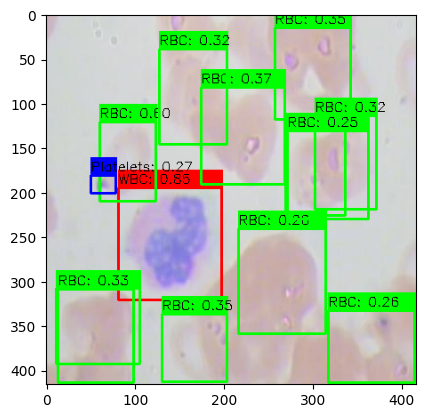

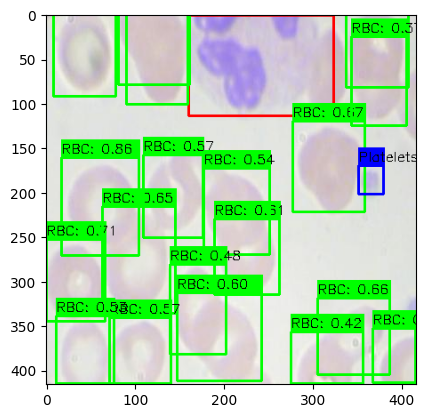

In [22]:
test_inference(model_2)

In [23]:
params['hsv_h'] = 0.02
params['hsv_s'] = 0.50
params['hsv_v'] = 0.30
params['degrees'] = 5.0
params['translate'] = 0.05
params['scale'] = 0.3
params['shear'] = 0.0
params['perspective'] = 0.0
params['flipud'] = 0.0
params['fliplr'] = 0.30
params['mosaic'] = 0.50
params['mixup'] = 0.0

In [24]:
model_3 =  YOLO('yolov8s.yaml')
model_3.train(**params)

Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

train: Scanning /kaggle/input/blood-cell-detection-datatset/train/labels... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<00:00, 943.04it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/blood-cell-detection-datatset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/blood-cell-detection-datatset/valid/labels... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<00:00, 757.58it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/blood-cell-detection-datatset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train5
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      3.84G      3.164      2.651       3.24        172        416: 100%|██████████| 48/48 [00:13<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.39it/s]

                   all         73        967          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      3.78G      2.752      2.423      2.769        240        416: 100%|██████████| 48/48 [00:08<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.55it/s]

                   all         73        967      0.445      0.287      0.134     0.0403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      3.68G      2.491      2.299      2.632        210        416: 100%|██████████| 48/48 [00:08<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         73        967     0.0429     0.0887     0.0368     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      3.68G      2.273      2.115      2.507        215        416: 100%|██████████| 48/48 [00:08<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]

                   all         73        967      0.484      0.501      0.282       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.67G      2.136      1.976      2.387        246        416: 100%|██████████| 48/48 [00:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]

                   all         73        967     0.0162      0.255     0.0293    0.00765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      3.77G      2.055       1.87      2.331        216        416: 100%|██████████| 48/48 [00:08<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]

                   all         73        967      0.499      0.605      0.546      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      3.61G      1.893      1.741      2.191        253        416: 100%|██████████| 48/48 [00:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.28it/s]

                   all         73        967       0.37     0.0541      0.014     0.0041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      3.61G      1.836      1.684      2.133        305        416: 100%|██████████| 48/48 [00:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]

                   all         73        967      0.488      0.292       0.33      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      3.61G      1.785      1.739       2.08        254        416: 100%|██████████| 48/48 [00:08<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]

                   all         73        967      0.466      0.421      0.406      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      3.61G      1.736       1.55      2.038        251        416: 100%|██████████| 48/48 [00:08<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]

                   all         73        967      0.773      0.391      0.531      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      3.61G      1.676      1.455      1.983        196        416: 100%|██████████| 48/48 [00:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]

                   all         73        967      0.718      0.639      0.709      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      3.61G      1.636      1.388      1.952        192        416: 100%|██████████| 48/48 [00:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         73        967      0.517      0.571      0.521      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      3.61G      1.603      1.357       1.93        187        416: 100%|██████████| 48/48 [00:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]

                   all         73        967      0.701      0.721      0.754      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      3.61G      1.578      1.302      1.902        230        416: 100%|██████████| 48/48 [00:08<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]

                   all         73        967       0.64       0.73      0.734      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      3.61G      1.546      1.284      1.862        217        416: 100%|██████████| 48/48 [00:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]

                   all         73        967        0.6      0.233      0.331      0.153


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      3.61G      1.469      1.216      1.852        161        416: 100%|██████████| 48/48 [00:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         73        967      0.556       0.62      0.712      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      3.61G       1.45      1.181       1.84        178        416: 100%|██████████| 48/48 [00:07<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]

                   all         73        967      0.484      0.802      0.719      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      3.61G      1.425      1.141      1.805        171        416: 100%|██████████| 48/48 [00:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]

                   all         73        967      0.728      0.601      0.688      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      3.61G      1.404      1.115      1.783        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]

                   all         73        967      0.697      0.675      0.728      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      3.61G       1.39      1.098      1.774        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.84it/s]

                   all         73        967      0.635      0.808      0.849      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      3.61G      1.367      1.076       1.75        168        416: 100%|██████████| 48/48 [00:08<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]

                   all         73        967      0.661      0.764      0.807      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      3.61G      1.354      1.051      1.733        182        416: 100%|██████████| 48/48 [00:07<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]

                   all         73        967       0.68      0.841      0.882      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      3.61G      1.348      1.043      1.741        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.89it/s]

                   all         73        967      0.757      0.875      0.883        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      3.61G      1.333      1.031      1.726        197        416: 100%|██████████| 48/48 [00:08<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]

                   all         73        967      0.741      0.867      0.883      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      3.61G      1.324       1.02       1.72        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]

                   all         73        967      0.797      0.872      0.888      0.546



25 epochs completed in 0.071 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 22.5MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]


                   all         73        967      0.797      0.873      0.888      0.546
             Platelets         73         76      0.788      0.834      0.858      0.464
                   RBC         73        819      0.703      0.787      0.818      0.508
                   WBC         73         72      0.899          1      0.987      0.667
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f4868b15000>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04


0: 416x416 12 RBCs, 1 WBC, 4.2ms
1: 416x416 1 Platelets, 21 RBCs, 1 WBC, 4.2ms
Speed: 0.7ms preprocess, 4.2ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


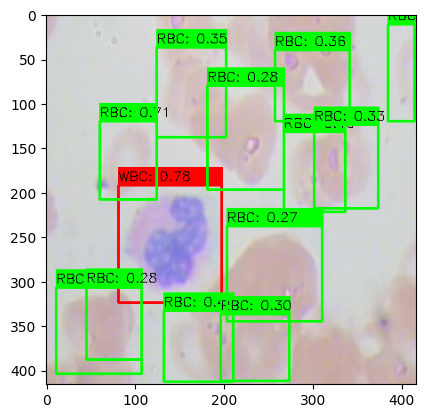

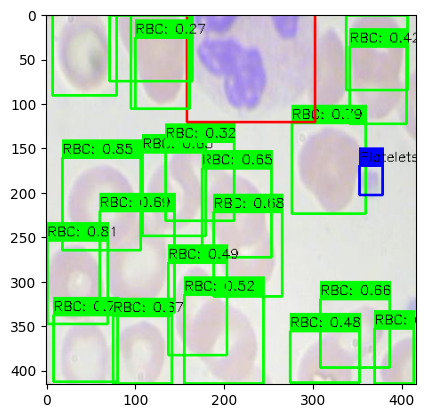

In [25]:
test_inference(model_3)

In [26]:
params['box'] = 10.0
params['cls'] = 2.0
params['dfl'] = 2.0

# TODO train model and test inference...